# **Técnicas Avanzadas de Machine Learning**

---
---
<!-- Star Wars: Episodio VII - El despertar de la Fuerza -->

<!-- script html for image -->
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/4/49/Star_Wars_The_Force_Awakens.jpg' width="650" height="300" />

</figure></center>

Fuente de la imagen: [Wikipedia](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_VII_-_El_despertar_de_la_Fuerza)


# **Índice**
---

> [1 - Support Vector Machines](#scrollTo=psBXfvGFjoFo)
<br>
>>
>> [1.1. Introducción a las Support Vector Machines](#scrollTo=F3VyExHe3foY)
>>
>> [1.2. Clasificación Binaria, Hiperplanos y Separabilidad Lineal](#scrollTo=FZz4XhdnvRpt)
>>>[1.2.1 - Clasificación Binaria e Hiperplanos](#scrollTo=Jh3d_Jsx7COV)
>>>
>>>[1.2.2 - Separabilidad Lineal](#scrollTo=0PH6-KGsbHBa)
>>>
>>>[1.2.3 - Similitud con otros modelos de Machine Learning](#scrollTo=akq6G-iPgHDK)
>>>
>> [1.3. Clasificador de Margen Máximo](#scrollTo=Cx0UlmSGI4Ep)
>>
>> [1.4. Clasificador de Vectores Soporte](#scrollTo=ZH_ctc7vJHQP)
>>> [1.4.1 - Definición alternativa del parámetro C](#scrollTo=P0xULzutrCEm)
>>>
>>> [1.4.2 - Conjuntos de datos no tratables con Clasificadores de Vector Soporte](#scrollTo=3x0j6ZWH6ihT)
>>>
>> [1.5. Máquinas de Vectores Soporte (Support Vector Machines)](#scrollTo=ZVhMZUqQJQrq)
>>> [1.5.1 - Clasificación con fronteras de decisión no lineales](#scrollTo=-riljz_hLQRY)
>>>
>>> [1.5.2 - Los Kernel en las Máquinas de Vectores Soporte](#scrollTo=cQRO76XqLDao)
>>>
>>> [1.5.3 - Kernel Lineal](#scrollTo=TIkPxb_HH5ss)
>>>
>>> [1.5.4 - Los Kernel no lineales](#scrollTo=RasqU9x5fXEY)
>>>
>>> [1.5.5 - Kernel Polinómico](#scrollTo=7F1LoAmi8QQN)
>>>
>>> [1.5.6 - Kernel Radial o Gaussiano](#scrollTo=p_Rf58qWc5kN)
>>>
>>> [1.5.7 - Kernel Sigmoide](#scrollTo=-f51a9mL1LmJ)
>>
>> [Actividad: Detección de Cáncer de Mama](#scrollTo=J2YHNs9c1_IW)
>>> [Solución](#scrollTo=YfT8U5vlAqCE)
>>
>> [Ideas Clave](#scrollTo=rFuJjVsSnDz-)


# 1 - Support Vector Machines

## 1.1 - Introducción a las Support Vector Machines

La primera vez que las **Máquinas de Vectores Soporte (SVM o *Support Vector Machines*)** fueron presentadas fue en la conferencia [COmputational Learning Theory (COLT)](https://dl.acm.org/conference/colt) en el año 1992 por Vapnik, Boser y Guyon [Boser et al., 1992], en Bell Labs, basando todo su fundamento teórico en los trabajos del propio Vapnik junto con otros autores sobre la teoría del aprendizaje estadístico a finales de los 70.

Pocos años después, los autores [Cortes & Vapnik, 1995; Vapnik, 1998] desarrollan en mayor detalle las SVM permitiendo así su aplicación práctica en diferentes problemas de reconocimiento de formas, continuando su desarrollo hasta días recientes en aplicaciones tan variadas como la recuperación de información, el reconocimiento y clasificación de imágenes, el procesamiento de lenguaje natural, el análisis de biosecuencias, el reconocimiento de escritura manuscrita y, en general, cualquier tarea de reconocimiento de patrones (*pattern recognition*) y minería de datos (*data mining*).

Las SVM forman parte de la familia de **clasificadores lineales** que **separan** el espacio mediante la introducción de un **hiperplano** en un **espacio de características** de muy alta dimensionalidad con la propiedad de maximizar el margen entre clases. Las SVM pueden ser utilizadas tanto en problemas de **clasificación** como de **regresión** y, en los primeros, tanto para **clasificación binaria** como para **múltiples clases**. Para ilustrar su funcionamiento matemático, desarrollaremos la formulación matemática para clasificación binaria, siendo extensible a los anteriores problemas mediante diferentes estrategias (p.ej., one-vs-all, all-pairs, etc.).

En general, no será posible separar totalmente el espacio de características inicial, con lo que aplicaremos dos modificaciones:
* **relajaremos la idea de "separar" el espacio**, permitiendo algunos incumplimientos
* aplicaremos **transformaciones al espacio de características**, de forma que sea lo más separable posible

\\

En cuanto a la **organización de este tema**, comenzaremos exponiendo los conceptos más básicos de separabilidad lineal.

Posteriormente, mostraremos modelos de menor a mayor potencia:
* Clasificador de Margen Máximo
* Clasificador de Vector Soporte
* Máquina de Vector Soporte

<br>
<p> <mark>RECUERDA</mark> </p>
<hr>

Las Máquinas de Vectores Soporte (*Support Vector Machines*) se caracterizan por:

*   Aplicarse para el reconocimiento de patrones usándolos como método de clasificación.
*   Aplicarse en la minería de datos como método predictivo.



## 1.2 - Clasificación Binaria, Hiperplanos y Separabilidad Lineal

### 1.2.1 - Clasificación Binaria e Hiperplanos


Definamos el problema de la **clasificación binaria** de la siguiente manera. Consideremos el siguiente conjunto de datos:

 $$ S=\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} $$

con $N$ ejemplos, donde cada ejemplo está compuesto por la tupla:

> $x_i \in R^p$, con $1 \le i \le N$, representando al ejemplo $i$ del espacio de entrada $X$ p-dimensional

e

> $y_i \in \{-1, 1\}$, con $1 \le i \le N$, representando la clase a la que pertenece $x_i$ del espacio de salida $Y$

A los elementos de $X$ los denominaremos vectores, instancias, observaciones o ejemplos, y a los elementos de $Y$, clases.

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

A diferencia de otros modelos de clasificador binario, a la clase negativa se le asigna el valor -1 en lugar de 0. El motivo es que resulta más adecuado geométricamente, como veremos más adelante.

\\

Podemos definir un **clasificador binario** basado en un hiperplano de separación mediante la siguiente regla:

 $$ f(x)=\sigma(h(x)) $$

donde la función se define como:

\\
\begin{equation}
\text { $\sigma(x)$} =
     \begin{cases}
      \text{ $1$} &\quad \text{si } x > 0 \\ \\
      \text{ $0$} &\quad \text{si } x = 0 \ \ (hiperplano)\\ \\
      \text{$-1$} &\quad \text{si } x < 0\\
     \end{cases}\\     
\end{equation}

y donde la función $h(x)$ define el **hiperplano** separador en el espacio p-dimensional ($R^p$).


En un espacio p-dimensional, un hiperplano es un espacio afín "plano" de dimensión $p-1$, de forma que:

*  si $p=2$, el hiperplano es una recta

*  si $p=3$, el hiperplano es un plano

<br>

Su definición matemática responde a la siguiente ecuación:

 $$ \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_{p-1} X_{p-1} = 0 $$

Como hemos dicho, en el caso de $p=2$ sería una recta:

 $$ \beta_0 + \beta_1 X_1 = 0 $$

**Vector ortogonal y distancia euclídea al hiperplano**

Una propiedad importante en Álgebra es que el **vector ortogonal al hiperplano** anteriormente definido viene dado por $\beta = (\beta_1, \beta_2, ..., \beta_p) \in R^p$.

Si se cumple que $ \sum_{j = 1}^{p} \beta^2_j=1 $ (esto es, que el **vector ortogonal está normalizado** y por lo tanto tiene longitud 1), la **distancia euclídea de un punto cualquiera $x^*$ al hiperplano** se obtiene sustituyendo las coordenadas del punto en la ecuación del hiperplano:

$$ x^* = (x_1^*, x^*_2, ..., x^*_p)$$

$$ \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + ... + \beta_p x^*_p = d $$

siendo $ d $ la distancia del punto $x^*$ al hiperplano.

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

El valor $d$ resultante al sustituir el punto $x^*$ en la ecuación del hiperplano debe interpretarse con signo, según esté a un lado u otro del hiperplano.


La **interpretación geométrica** del clasificador binario basado en hiperplano sería la siguiente:

* Si $ \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + ... + \beta_p x^*_p = 0 $

diremos que $x^*=(x^*_1, x^*_2, ..., x^*_p)$ satisface la ecuación porque está **en el hiperplano**.

* Si $ \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + ... + \beta_p x^*_p > 0 $

diremos que $x^*$ está **en un lado del hiperplano** y pertenece a la clase con valor 1.

* Si $ \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + ... + \beta_p x^*_p < 0 $

diremos que $x^*$ está en **el otro lado del hiperplano** y pertenece a la clase con valor -1.

<br>
<p> <mark>SABIAS QUE...</mark> </p>
<hr>

Se podría considerar que el hiperplano separa el espacio $p$-dimensional en dos partes.

<br>

En el siguiente ejemplo, se define el hiperplano (línea) separador como:

$$ X_2=0.2 X_1 + 2.15 $$

La clase se asigna dependiendo de en qué lado del hiperplano cae el ejemplo observado:

*   Si $h(X) > 0$ se asigna a la clase $+1$
*   Si $h(X) < 0$ se asigna a la clase $-1$



<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

Cuanto más grande sea la magnitud de $|h(X)|$, más lejos se encontrará X del hiperplano, y por tanto más confiable será la predicción.


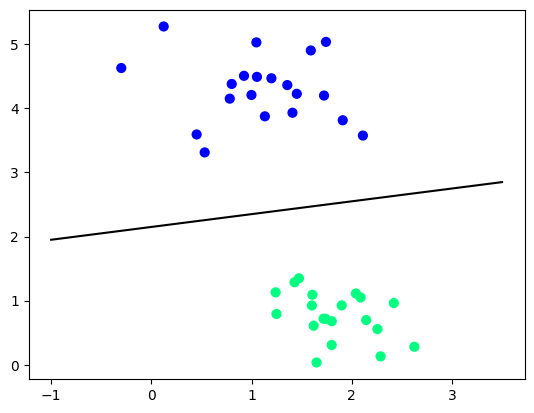

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets.samples_generator import make_blobs # sklearn 0.23.2 o inferior
# ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator' (ocurre en sklearn > 0.23)

from sklearn.datasets import make_blobs # sklearn 1.0.1 o superior

X, y = make_blobs(n_samples=40, centers=2,
                  random_state=0, cluster_std=0.50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter');

x = np.linspace(-1, 3.5)
m = 0.2 # pendiente
b = 2.15 # ordenada en el origen

plt.plot(x, m * x + b, '-k')
plt.show()
plt.close()

### 1.2.2 - Separabilidad Lineal

Dado un conjunto de datos **linealmente separables** pertenecientes a dos clases (clasificación binaria), se pueden utilizar diversos algoritmos (e.g., Exponentiated-Gradient Descent, Perceptron, Sleeping Experts, Widrow-Hoff, etc.) para construir el hiperplano $(w, b)$ que los clasifique correctamente.

La ventaja de las SVM respecto a las redes neuronales, por ejemplo, es que **la convergencia está asegurada**. Sin embargo, dependiendo del algoritmo utilizado para la obtención del hiperplano, las soluciones pueden ser diferentes.

Esto se debe a que no tiene por qué existir una solución única (un hiperplano) que separe correctamente el espacio del conjunto de datos acorde a las clases, sino que puede haber **infinitos hiperplanos** que lo hagan, como muestra el ejemplo a continuación.


<br>


Observemos el siguiente gráfico:

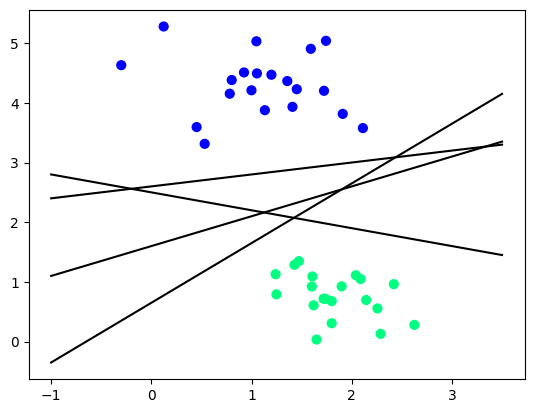

In [2]:
X, y = make_blobs(n_samples=40, centers=2,
                  random_state=0, cluster_std=0.50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter');

x = np.linspace(-1, 3.5)

for m, b in [(1, 0.65), (0.5, 1.6), (0.2, 2.6), (-0.3, 2.5)]:
    plt.plot(x, m * x + b, '-k')

<br>
<p> <mark>RECUERDA</mark> </p>
<hr>

**La convergencia está asegurada en las SVM** (respecto a las redes neuronales).

\\

Una forma de demostrar que un determinado hiperplano separa linealmente un conjunto de puntos de dos clases posibles es comprobar que se cumple la ecuación siguiente:

$$y_i h(x^*_i) > 0 \text{ para cada } i=1,..., n$$

Se puede ver fácilmente que se cumple **si coincide el signo de la clase ($y_i \in \{-1, 1\}$) y el signo de $h(x^*_i)$** para todos los puntos, lo que significa que todos los puntos están en el lado correcto:

* los de la clase $y_i = 1$ en el lado que $h(x^*_i) >0$
* los de la clase $y_i = -1$ en el lado que $h(x^*_i) <0$

<br>
<p> <mark>¿SABÍAS QUE...?</mark> </p>
<hr>

Un conjunto de datos con menos ejemplos que dimensiones, es decir que N < p, siempre es separable linealmente. Un ejemplo son los datos de genomas.

### 1.2.3 - Similitud con otros modelos de Machine Learning
Es importante ver la similitud con otros modelos como la Regresión Lineal, vista en un módulo anterior, o el Perceptrón, que veremos en el tema siguiente.

De esta forma, teniendo en cuenta las siguientes analogías:
* el vector $\beta = (\beta_1, \beta_2, ..., \beta_p) $ equivale al vector $w = (w_1, w_2, ..., w_p) \in R^p$ de los pesos (*weight*) que representan la importancia de cada atributo o característica en la regla de clasificación en una regresión lineal o un perceptrón
* la coordenada $\beta_0$ equivale al parámetro $b \in R$ de umbral de decisión o sesgo (*bias*)

el hiperplano $h(x)$ puede ser expresado por:

 $$ h(x)=<w, x> + b $$

donde:

> $<·,·>$ expresa el producto escalar en $R^p$

> $x \in R^p$ es la representación vectorial de los ejemplos.


## 1.3 - Clasificador de Margen Máximo

Suponiendo que el conjunto de ejemplos $S$ es linealmente separable, la idea detrás de las SVM es la de seleccionar el hiperplano separador que **maximiza el margen** respecto a los ejemplos del conjunto de datos más cercanos de cada clase. Esto significa que **sólo tiene en cuenta los ejemplos en las fronteras de la región de decisión** y no todos los ejemplos del conjunto de datos, lo que podría sesgar la decisión hacia la clase más numerosa.

Estos ejemplos en la frontera son los denominados **vectores soporte**, que se denominan así (y dan nombre a los modelos de Clasificador de Vectores Soporte y Máquina de Vectores Soporte, que veremos posteriormente) porque, en caso de variar ligeramente, provocan que cambie también el hiperplano.

El **margen máximo es la distancia entre el hiperplano y la perpendicular a éste que pasa por cualquiera de los vectores soporte**, cuyo cálculo hemos visto anteriormente.

La idea subyacente del Clasificador de Margen Máximo es que, si separa bien los ejemplos de entrenamiento, se supone que clasificará correctamente los ejemplos de prueba (si su distribución es parecida a la del conjunto de ejemplos de entrenamiento).

En la siguiente imagen, los ejemplos en las líneas discontinuas permiten comprender mejor los vectores soporte.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/albertojulian/master-ub/raw/main/SVM_Imagen3.png' width="450" height="450" />
<figcaption>Imagen1. Ejemplo Clasificador Margen Máximo </figcaption></center>
</figure>

Fuente de la imagen: [James et al., 2013] (pág. 342)

\\


Dado:

> $n$ observaciones para entrenar el clasificador $x_1, x_2, ..., x_n$

> $p$ dimensiones

> $y_1, y_2, ..., y_n \in \{1, -1\}$, correspondiéndose con la clase asignada a cada observación $x_i$

>Margen de tamaño $M$ (distancia entre el hiperplano y la perpendicular a éste que pasa por los vectores soporte)

\\

Consiste en resolver el siguiente **problema de optimización**:

Maximizar $M$ para $\beta_0, \beta_1, ..., \beta_p$

Sujeto a las siguientes restricciones:

$$ \sum_{j = 1}^{p} \beta^2_j=1 $$

$$ y_i(\beta_0+\beta_1X_{i1}+\beta_2X_{i2}+...+\beta_pX_{ip}) \ge M \text{ para cada } i=1,..., n $$

\\

Una vez maximizado el margen $M$, se clasifican los puntos según el signo de la función $\sigma$ descrita anteriormente.

<br>
<p> <mark>IMPORTANTE.</mark> </p>
<hr>


La anterior aproximación basada en margen máximo tiene dos principales inconvenientes:

- No es robusto con respecto a observaciones individuales.
- No puede ser aplicado si no existe un hiperplano separador (problema de la separabilidad lineal).

<br>

$\bbox{Ejemplo.}$

En la siguiente imagen se muestra un conjunto de datos con dos clases que no son separables linealmente.

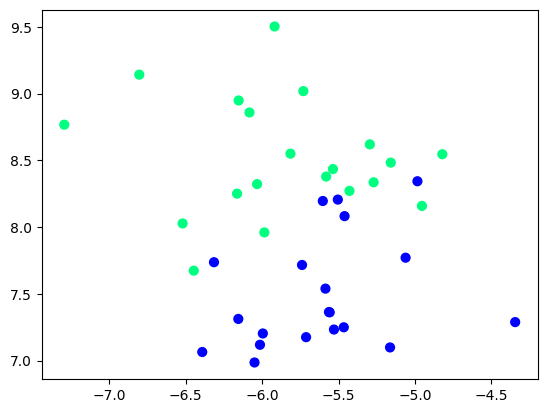

In [3]:
X, y = make_blobs(n_samples=40, centers=2,
                  random_state=5, cluster_std=0.50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter');


Para clasificar un conjunto de datos como el anterior necesitamos evolucionar del concepto de **Clasificador de Margen Máximo** al concepto de **Clasificador de Vectores Soporte** que veremos a continuación.

## 1.4 - Clasificador de Vectores Soporte

Con el objetivo de superar los inconvenientes anteriores, los clasificadores de vectores soporte se basan en la idea de obtener un hiperplano que **no tiene por qué separar perfectamente las dos clases**, consiguiendo así ser más robustos a observaciones individuales así como mejorar la clasificación de la mayoría de observaciones.

Así, introducimos el concepto del margen suave (***soft margin***) que implica que el margen máximo puede ser "vulnerado" por algunos de los ejemplos de entrenamiento, **reduciendo así el sobreajuste** a los datos de entrenamiento y mejorando la capacidad de generalización.

\\

Su formulación matemática es similar, consistiendo en **resolver el siguiente problema de optimización:**

Maximizar $M$ para $\beta_0, \beta_1, ..., \beta_p, \epsilon_1, ..., \epsilon_n$

Sujeto a las siguientes restricciones:

 $$ \sum_{j = 1}^{p} \beta^2_j=1 $$

 $$ y_i(\beta_0+\beta_1X_{i1}+\beta_2X_{i2}+...+\beta_pX_{ip}) \ge M(1-\epsilon_i)\text{ para cada }i=1,..., n $$

con:

$$ \epsilon_i \ge 0, \sum_{i=1}^{n} \epsilon_i \le C $$

\\

Donde $\epsilon_1, \epsilon_2, ..., \epsilon_n$ son las *variables de holgura* (**slack**) que permiten que ciertas observaciones caigan en el lado erróneo del margen o del hiperplano, según los siguientes valores:

*   $\epsilon_i = 0$ indica que la observación $i$ está en el lado correcto del margen.

*   $0 < \epsilon_i < 1$ indica que la observación $i$ está en el lado incorrecto del margen.

* $ \epsilon_i = 1$ indica que la observación $i$ está en el hiperplano.

*   $ \epsilon_i > 1$ indica que la observación $i$ está en el lado incorrecto del hiperplano.

\\

En la siguiente imagen se muestran ejemplos de vulneraciones del margen máximo.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/albertojulian/master-ub/raw/main/SVM_Imagen5.png' width="800" height="450" />
<figcaption>Imagen2. Ejemplo de vulneraciones del margen máximo </figcaption></center>
</figure>

Fuente de la imagen: [James et al., 2013] (pág. 346) y elaboración propia

\\

En la parte izquierda no hay observaciones en el lado incorrecto del hiperplano:


* Observaciones <font color='Red'><b> rojas</b></font>: las observaciones 3, 4, 5 y 6 están en el lado correcto del margen ($\epsilon_3, \epsilon_4, \epsilon_5, \epsilon_6=0$), la observación 2 está sobre el margen (es un vector soporte, $\epsilon_2=0$), y la observación 1 está en el lado incorrecto del margen ($0 < \epsilon_1 < 1$)

* Observaciones <font color='Blue'><b> azules</b></font>: las observaciones 7 y 10 están en el lado correcto del margen ($\epsilon_7, \epsilon_{10}=0$), la observación 9 está sobre el margen (es un vector soporte, $\epsilon_9=0$), y la observación 8 está en el lado incorrecto del margen ($0 < \epsilon_8 < 1$)

La parte derecha añade las observaciones 11 y 12 que están en el lado incorrecto del hiperplano ($\epsilon_{11}, \epsilon_{12} > 1$).

\\

$C$ es un *parámetro de ajuste/afinación* (**tuning**) que determina el número y severidad de las vulneraciones permitidas al margen o al hiperplano, con los siguientes posibles valores:

*   Si $C=0$ no se acepta ninguna observación en el lado erróneo del hiperplano.

*   Si $C > 0$ se aceptan no más de C observaciones en el lado erróneo del hiperplano.

<br>
<p> <mark>IMPORTANTE.</mark> </p>
<hr>

Algunas consideraciones sobre el parámetro $C$:

- Es un parámetro de tuning generalmente elegido por validación cruzada.

- Controla la compensación sesgo-varianza:

 - Un $C$ bajo implica márgenes estrechos que raramente son vulnerados, lo que implica un alto (sobre) ajuste a los datos, lo que reduce el sesgo pero incrementa la varianza.

 - Un $C$ alto implica márgenes anchos que permiten mayores vulneraciones, lo que implica un bajo ajuste a los datos, incrementando el sesgo pero reduciendo la varianza.

<br>
<p> <mark>RECUERDA</mark> </p>
<hr>

- Una observación que cae en el **lado correcto del margen, NO afecta** al clasificador de vectores soporte.

- **Sólo los vectores soporte afectan** al clasificador de vectores soporte.




<br>


### 1.4.1 - Definición alternativa del parámetro C

La definición del parámetro C del apartado anterior es la definición clásica que podemos encontrar en un libro de referencia como "*An Introduction to Statistical Learning*", de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani (Springer, 2013).

Según esta definición, **un valor elevado del parámetro C se caracteriza por una varianza baja y un sesgo alto, por lo que se produce *underfitting***.

Alternativamente, y con el enorme inconveniente de generar confusión, existe otra definición del parámetro C que se aplica en un paquete tan común como sklearn: "Regularization parameter. The strength of the regularization is inversely proportional to C" ([scikit-learn, SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

Según esta definición alternativa, **si el valor de C es elevado, la varianza es alta, el sesgo es bajo y el modelo incurre en *overfitting***.

<font color='Red'><b> Por lo tanto, tenemos dos efectos opuestos dependiendo de qué definición del parámetro C estemos considerando, por lo que debemos verificar qué definición se implementa en el modelo o paquete con el que estemos trabajando. </b></font>



### 1.4.2 - Conjuntos de datos no tratables con Clasificadores de Vector Soporte

Hay conjuntos de datos cuyas clases están distribuidas de forma que admitir vulneraciones al margen no es suficiente para realizar una clasificación adecuada, como es el caso del ejemplo siguiente.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/albertojulian/master-ub/raw/main/SVM_Imagen0.png' width="900" height="450" />
<figcaption>Imagen3. Ejemplo problema de clasificación </figcaption></center>
</figure>

Fuente de la imagen: [James et al., 2013] (pág. 349)

\\

Ejemplos como el anterior requieren evolucionar desde el concepto de **Clasificador de Vectores Soporte** al concepto de **Máquina de Vectores Soporte** que veremos a continuación.

## 1.5 - Máquinas de Vectores Soporte (Support Vector Machines)

En primer lugar veremos el enfoque genérico para transformar un clasificador lineal en un clasificador para espacios de datos con fronteras de decisión no lineales.

Posteriormente veremos cómo las Máquinas de Vectores Soporte realizan esta transformación de forma automática mediante el uso de diversos *kernel*.


### 1.5.1 - Clasificación con fronteras de decisión no lineales

En la [Imagen3](#scrollTo=3x0j6ZWH6ihT&line=1&uniqifier=1) vimos un caso de espacio de datos en el que la frontera entre las dos clases es no lineal. Para abordar este tipo de problemas debemos aplicar alguna transformación que incluya componentes no lineales de las coordenadas originales.

\\

Un **ejemplo** podría ser añadir los **cuadrados de las coordenadas**:

$$ X_1, X_2, ..., X_p => X^2_1, X^2_2, ..., X^2_p $$

Matemáticamente, la **clasificación no lineal en este caso** consistiría en maximizar $M$ dado:

$$ \beta_0,\beta_{11}, \beta_{12},...,\beta_{p1}, \beta_{p2}, \epsilon_1, \epsilon_2, ..., \epsilon_n $$

La ecuación de clasificación sería igual a la del Clasificador de Vectores Soporte añadiendo un sumatorio con los cuadrados de las coordenadas:
$$ y_i(\beta_0+\sum_{j=1}^{p}\beta_{j1}x_{ij}+\sum_{j=1}^{p} \beta_{j2}x^2_{ij}) \ge M(1-\epsilon_i) $$

\\

Otro **ejemplo** sería añadir **productos cruzados**:
$$X_1, X_2, ..., X_p => X_1 X_2, X_1 X_3, ...,X_1 X_p, ...$$

\\

Otra **alternativa** sería utilizar **funciones no polinómicas**. En cualquier caso, hay que ser precavido y limitar la dimensión del nuevo espacio de características, para evitar problemas de rendimiento.

\\

Veamos cómo consiguen realizar las Máquinas de Vectores Soporte este tipo de transformaciones sin penalizar excesivamente el rendimiento.


### 1.5.2 - Los Kernel en las Máquinas de Vectores Soporte

Las **Máquinas de Vectores Soporte** o SVM (*Support Vector Machines*) introducen el concepto de funciones núcleo (***kernel***) para poder aproximar tareas en las que no se puede asegurar (o incluso conocer) la separabilidad lineal de los datos. Es decir, se usan para clasificar datos para los cuales la frontera entre las clases no es lineal.

Las SVM, mediante la introducción de kernels,  realizan una **transformación no lineal del espacio de entrada** a un espacio dotado de un producto escalar y en el que se pueden aplicar los mismos razonamientos del clasificador de vectores soporte por margen máximo explicado anteriormente.

Es decir, si el conjunto de datos es linealmente separable en el espacio de características obtenido mediante la aplicación de un determinado kernel, entonces se puede aplicar el clasificador de vectores soporte por margen máximo lineal sobre este espacio transformado.

Finalmente, se anula la transformación proyectando el hiperplano del espacio transformado al espacio original, donde será una frontera de decisión no lineal.

Aunque no es objeto de estudio en este tema, conviene saber que la solución del Clasificador de Vectores Soporte depende del producto escalar de las observaciones:
$$ <x_i, x_{i'}>= \sum_{j=1}^{p} x_{ij} x_{i'j} $$


### 1.5.3 - Kernel Lineal

Apoyándonos en la relación con el producto escalar que acabamos de mencionar, el **Clasificador Lineal (o Kernel Lineal) de Vectores Soporte** se puede definir como:

$$ f(x) = \beta_0+\sum_{i \in S} \alpha_i <x, x_i> $$

Donde:

> $<⋅,⋅>$  expresa el producto escalar en $R^p$

> $\alpha$ es un parámetro que es distinto de cero sólo si la observación es un vector soporte.

> $S$ representa el espacio donde $\alpha_i <> 0$ (los vectores soporte)

Esta definición basada en el producto escalar se puede interpretar como que el Kernel Lineal cuantifica la similitud de dos observaciones.


<br>

$\bbox{Ejemplo.}$

Veamos un **ejemplo con Kernel Lineal**. Se sugiere cambiar el parámetro STD para acercar/alejar los ejemplos entre clases para ver cómo varía el ajuste del hiperplano y el margen.

Los Vectores Soporte son:
 [[ 0.13287362  2.42203068]
 [-0.01985524  2.95477029]
 [ 0.20378111  2.66381886]
 [ 2.75045017  3.37537334]
 [ 3.13253697  2.92213994]
 [ 1.23710312  2.71222537]
 [ 3.46910711  2.69875838]
 [ 1.03805253  1.8993928 ]
 [ 0.94080029  2.74410379]
 [ 2.06524254  2.59424063]]


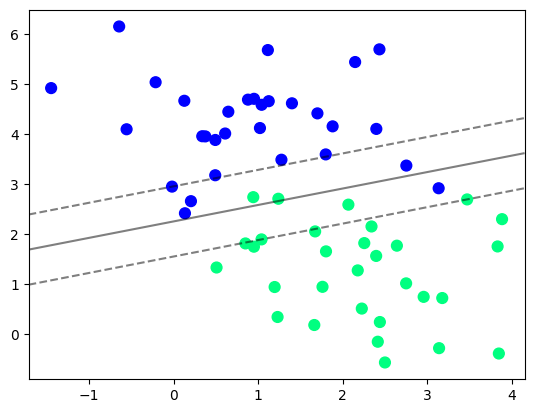

In [4]:
from sklearn.svm import SVC # "Support vector classifier"

STD = 0.95 # 0.8 0.7
C = 1 # 1 10 1E10

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X, y = make_blobs(n_samples=60, centers=2,
                  random_state=0, cluster_std=STD)

model = SVC(kernel='linear', C=C)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='winter')
plot_svc_decision_function(model)

print("Los Vectores Soporte son:\n", model.support_vectors_)

### 1.5.4 - Los Kernel no lineales
A continuación veremos otros kernel que son no lineales, en los cuales la **SVM (no lineal basada en kernel)** se expresa generalizando como:

$$ f(x) = \beta_0 + \sum_{i \in S} \alpha_i K(x, x_i) $$

donde $K$ es el kernel que transforma el espacio de entrada de manera no lineal al nuevo espacio de características.


<br>



### 1.5.5 - Kernel Polinómico

El Kernel **Polinómico** de grado "d" se define de la forma siguiente:

$$ K(x_i,x_{i'}) = (1 + \sum_{j=1}^{p} x_{ij}x_{i'j})^d $$

Como se puede observar, es parecido al Kernel Lineal elevado a la potencia $d$.

Al elegir un valor de $d > 1$ conseguimos fronteras de decisión basadas en polinomios de grado $d$, por lo tanto mucho más adaptables que con el Kernel Lineal.




### 1.5.6 - Kernel Radial o Gaussiano

El Kernel **Radial o Gaussiano** se define así:

$$ K(x_i,x_{i'}) = exp(-\gamma\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2) $$
donde $$\gamma=\frac{1}{2\sigma^2}>0 $$

El funcionamiento del Kernel Radial es el siguiente: si una observación de **prueba** $x^* = (x^*_1, ..., x^*_p)^T$ está a una distancia euclídea elevada de una observación de **entrenamiento** $x_i$, el valor $\sum_{j=1}^{p} (x^*_j-x_{ij})^2$ será elevado y por lo tanto $ K(x^*,x_i)$ será muy reducido, al ser la exponencial negativa de un valor elevado. En otras palabras, $x_i$ influirá muy poco en el cálculo de $f(x^*)$.

Generalizando, las observaciones de entrenamiento alejadas de $x^*$ influyen muy poco en la predicción de la etiqueta de la clase de $x^*$. En otras palabras, el Kernel Radial tiene un comportamiento local.

\\

$\bbox{Ejemplo.}$

Veamos un **ejemplo con Kernel Radial o Gaussiano**. En primer lugar, generamos un conjunto de datos no separables linealmente.



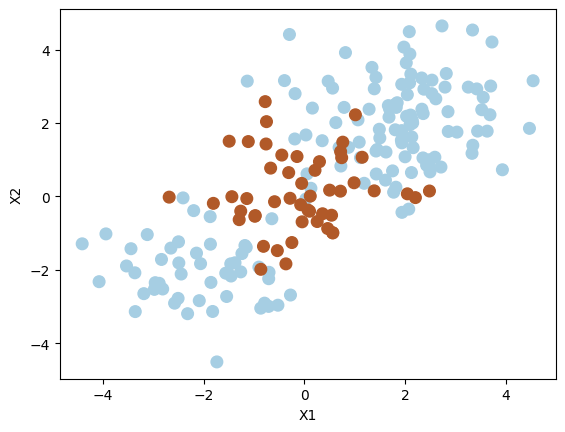

In [12]:
from sklearn.svm import SVC

# La funcion plot_svc muestra la frontera de decisión y marca los vectores soporte
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# Generamos datos
np.random.seed(8)
X = np.random.randn(200,2) # genera 200 muestras
X[:100] = X[:100] +2 # desplaza 100 primeras muestras a la derecha
X[101:150] = X[101:150] -2 # desplaza 50 siguientes muestras a la izquierda

# las 100+50 muestras desplazadas se asignan a la clase -1
# las 50 últimas muestras se asignan a la clase 1
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

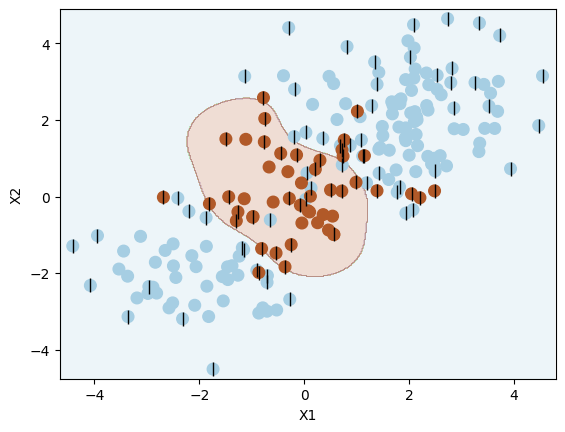

Number of support vectors:  90


In [13]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X, y)
plot_svc(svm, X, y)

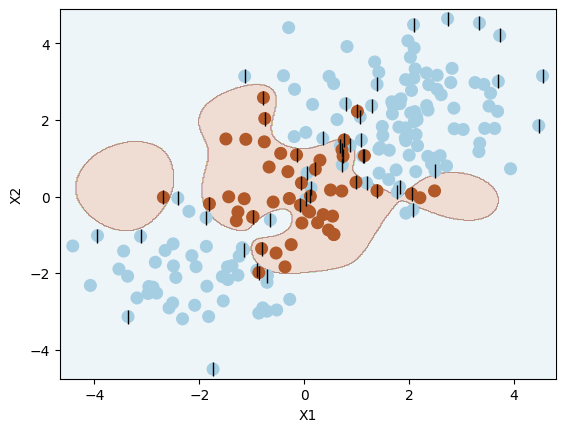

Number of support vectors:  56


In [14]:
svm2 = SVC(C=100, kernel='rbf', gamma=1)
svm2.fit(X, y)
plot_svc(svm2, X, y)

Al aumentar el valor de C ha disminuido el número de vectores soporte y ha aumentado la adaptación de la frontera de decisión; se corre el riesgo de que se produzca overfitting (sobreajuste) y el modelo no generalice bien para clasificar datos de prueba.

<br>
<p> <mark>RECUERDA</mark> </p>
<hr>
<br>

La definición del parámetro C de sklearn tiene efectos opuestos a lo del parámetro C del apartado del Clasificador de Vectores Soporte.

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>
<br>

Algunas **consideraciones al kernel radial**:

El parámetro $\sigma$ del kernel Gaussiano (**bandwidth**) controla la velocidad a la que el kernel tiende a cero en función de la distancia:

* **Cuando $\sigma^2$ es muy pequeño**, la distancia al centro está muy localizada, por lo que todos los puntos fuera de un determinado radio están igualmente lejos.

* **Cuando $\sigma^2$ es muy grande**, el kernel es equivalente al lineal.

\\

Por lo que:

* Cuando $\gamma$ es pequeño, existe mayor solape entre las Gaussianas y por lo tanto mayor suavidad en la frontera de decisión.

* Cuando $\gamma$ es grande, los puntos tienden a ser ortogonales entre sí, dando lugar a sobreajuste.

\\

Una consecuencia de lo anterior es que **el kernel Gaussiano suele ser muy útil cuando se dispone de pocas características y muchos datos de entrenamiento** (observaciones).


### 1.5.7 - Kernel sigmoide

El Kernel **Sigmoide** se define de la forma siguiente:

$$K(x_i,x_{i'}) = tanh(s<x_i,x_i'>+r)$$
$$s,r \in R$$


<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

Dependiendo del problema, un kernel puede ser más adecuado que otro, por lo que es importante tanto conocer la naturaleza del problema y los fundamentos matemáticos de los kernels, como realizar una evaluación empírica de los mismos para ver su adecuación práctica y real al problema.

A continuación, retomamos un dataset anterior que no es abordable con kernel lineal pero sí con otros tipos de kernel, como el polinómico y el gaussiano:

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/albertojulian/master-ub/raw/main/SVM_Imagen1.png' width="900" height="450" />
<figcaption>Imagen4. Ejemplo problema de clasificación con kernel no lineales </figcaption></center>
</figure>

Fuente de la imagen: [James et al., 2013] (pág. 353)


<p> <mark>NOTA</mark> </p>
<hr>

Hay distintas tipologías dentro del muestreo que se desarrollarán más adelante.
Se pueden definir kernels para tratar otros tipos de datos, incluso en espacios no vectoriales, tales como las secuencias de caracteres, genómica, grafos, etc.

## Actividad guiada: Detección de Cáncer de Mama

Estamos interesados en desarrollar un clasificador automático que discrimine entre casos de tumores de mama malignos y benignos. Para ello, utilizaremos el dataset "[Breast Cancer Wisconsin](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)" disponible en sklearn.

Hay que responder los siguientes apartados:

1. ¿En qué consiste este dataset? Es decir, saber identificar el tamaño, número de características y su nombre, número de clases, número de instancias, número de instancias por clase, etc.

2. ¿Cómo podemos optimizar los parámetros del clasificador SVM (kernel, parámetros del kernel, variable de ajuste $C$)?

3. ¿Son los parámetros óptimos del SVM los óptimos para predecir casos nuevos?

4. ¿Cuál es el kernel que obtiene mejores resultados?, ¿y peores?, ¿cuál es el kernel más rápido?, ¿y el más lento?



### Solución

[*A continuación, haz clic para conocer la solución.*]

#### **1. ¿En qué consiste este dataset?**

En primer lugar, cargamos el dataset desde sklearn y lo exploramos para conocer su estructura y características, lo que nos permitirá comprender mejor de qué disponemos para solucionar el problema.

In [15]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

print("Nº características: ", len(data.feature_names))
print("Características: ", data.feature_names)
print()
print("Nº clases: ", len(data.target_names))
print("Clases: ", data.target_names)
print()
print("Nº de instancias: ", len(data.data))
print("Nº de instancias por clase:")
for c in range(len(data.target_names)):
  print("\tClase '", data.target_names[c], "': ", len(data.target[data.target==c]))



Nº características:  30
Características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nº clases:  2
Clases:  ['malignant' 'benign']

Nº de instancias:  569
Nº de instancias por clase:
	Clase ' malignant ':  212
	Clase ' benign ':  357


También podemos representar gráficamente parejas de características (gráfica 2D) para ver cómo se distribuyen las clases y observar así, a priori, su separabilidad como para ser buenos descriptores del problema.

¿Podríamos decir que la media del radio y la media de la textura del tumor sería un buen descriptor del problema?, ¿podríamos decir que la clase es linealmente separable en este espacio $2$-dimensional?

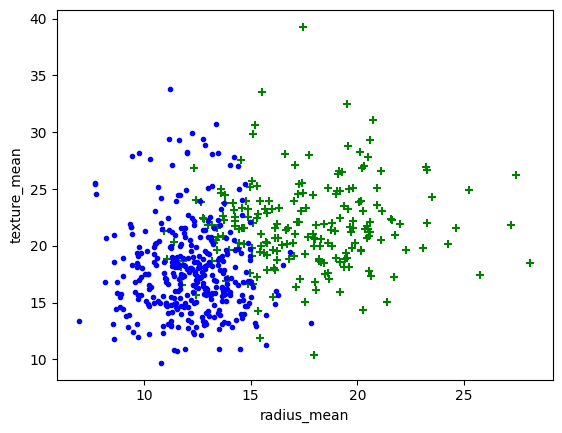

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

malignant = data.data[data.target == 0]
benign = data.data[data.target == 1]


plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(malignant[:,0], malignant[:,1], color='green', marker='+')
plt.scatter(benign[:,0], benign[:,1], color='blue', marker='.')
plt.show()
plt.close()

#### **2. ¿Cómo podemos optimizar los parámetros del clasificador SVM?**

Para optimizar los parámetros del clasificador se utiliza una búsqueda ***grid*** sobre dichos parámetros y se elige la mejor combinación mediante ***validación cruzada***. Eso significa que se entrenará el clasificador con todas las posibles combinaciones de parámetros definidas en el grid, y mediante validación cruzada se evaluará para obtener la mejor de dichas combinaciones.

Es importante recordar que, como en cualquier otro modelo de Machine Learning, se debe entrenar sobre una parte del dataset, el ***conjunto de entrenamiento***, dejando libre otra parte para una posterior evaluación del mismo.

Si no lo hiciéramos así, estaríamos aprendiendo a optimizar los parámetros con todos los ejemplos del dataset y no podríamos saber cómo se comporta ante nuevos casos nunca vistos.

De ahí que lo primero que hagamos sea partir el dataset en dos, una parte de entrenamiento (que usaremos previamente para encontrar la mejor combinación de parámetros), y una parte de evaluación.

Vamos a aplicar en este caso la regla del 70/30 para partir el dataset.

In [18]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

Una vez realizada la separación entre entrenamiento y evaluación, procedemos a realizar una búsqueda grid de los mejores parámetros de la SVM. **Los tres parámetros a optimizar son:**

* El kernel, que buscaremos entre lineal, polinómico, Gaussiano y sigmoide.

* El parámetro $C$ de ajuste, que buscaremos entre 1 y 1000.

* El parámetro del kernel, por ejemplo, el grado en el kernel polinómico o $\gamma$ en el kernel Gaussiano.



In [20]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve,GridSearchCV
parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]}
                    ]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(Xtrain, Ytrain)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", grid.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff)

La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 1, 'kernel': 'linear'}
Tiempo necesario para su cómputo:  01:36:133655


#### **3. ¿Son los parámetros óptimos del SVM los óptimos para predecir casos nuevos?**

A priori, los parámetros encontrados anteriormente deberían ser los mejores dados un conjunto de datos y por defecto son los que se debería utilizar.

Sin embargo, cuando se aplica a nuevos ejemplos nunca antes vistos, puede suceder que haya alguna otra combinación de parámetros mejor. El problema está en que en un escenario real, ese nuevo conjunto de ejemplos nunca antes visto NO está etiquetado, por lo que no podemos saber su rendimiento, a no ser que manualmente los etiquetemos y volvamos a evaluar la SVM.

Lo que se suele realizar para verificar que los parámetros elegidos son potencialmente los mejores también con un conjunto de datos nuevo es lo que hemos hecho de dividir entre un conjunto de entrenamiento y otro de evaluación, y verificar si es así.

In [21]:
minAcc = 100
maxAcc = 0
rapidoAcc = 0
lentoAcc = 0
mejorTime = 0
peorTime = 0
minTime = 1000000000
maxTime = 0

mejorModelo = SVC()
peorModelo = SVC()
rapidoModelo = SVC()
lentoModelo = SVC()

from sklearn.metrics import confusion_matrix,classification_report

kernel = "linear"

for c in (1, 10, 100, 1000):
  print("Kernel lineal con C=", c)

  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(Xtrain,Ytrain)
  print(modelo)
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(Xtest, Ytest)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(Xtest)
  print("Matriz de confusión:")
  print(confusion_matrix(Ytest, predicciones))
  print(classification_report(Ytest, predicciones))
  print("---------------------------------------")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel lineal con C= 1
SVC(C=1, kernel='linear')
Precisión (accuracy):  0.9298245614035088
Tiempo entrenamiento:  00:00:406699
Matriz de confusión:
[[64  5]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        69
           1       0.95      0.93      0.94       102

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

---------------------------------------

Kernel lineal con C= 10
SVC(C=10, kernel='linear')
Precisión (accuracy):  0.9181286549707602
Tiempo entrenamiento:  00:06:622464
Matriz de confusión:
[[64  5]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.95      0.91      0.93       102

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.92       171
weighted avg       0.92 

In [22]:
kernel = "poly"

for c in (1, 10, 100, 1000):
  for degree in range(10):
    print("Núcleo polinómico de grado", degree+1, "con C=", c)
    timeIni = time()
    modelo = SVC(kernel = kernel, degree=degree+1, C=c).fit(Xtrain,Ytrain)
    print(modelo.fit(Xtrain, Ytrain))
    timeEnd = time()
    timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

    acc = modelo.score(Xtest, Ytest)
    print("Precisión (accuracy): ", acc)
    print("Tiempo entrenamiento: ", timeDiff)

    predicciones = modelo.predict(Xtest)
    print("Matriz de confusión:")
    print(confusion_matrix(Ytest, predicciones))
    print(classification_report(Ytest, predicciones))
    print("---------------------------------------")
    print()

    if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Núcleo polinómico de grado 1 con C= 1
SVC(C=1, degree=1, kernel='poly')
Precisión (accuracy):  0.9122807017543859
Tiempo entrenamiento:  00:00:015963
Matriz de confusión:
[[57 12]
 [ 3 99]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        69
           1       0.89      0.97      0.93       102

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171

---------------------------------------

Núcleo polinómico de grado 2 con C= 1
SVC(C=1, degree=2, kernel='poly')
Precisión (accuracy):  0.9181286549707602
Tiempo entrenamiento:  00:00:011244
Matriz de confusión:
[[59 10]
 [ 4 98]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.89        69
           1       0.91      0.96      0.93       102

    accuracy                           0.92       171
   macro avg       0.92      0.91 

In [23]:
kernel = "rbf"

for c in (1, 10, 100, 1000):
  for gamma in (10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001):
    print("Kernel Gaussiano con gamma ", gamma, "con C=", c)
    timeIni = time()
    modelo = SVC(kernel = kernel , gamma=gamma, C=c).fit(Xtrain,Ytrain)
    print(modelo.fit(Xtrain, Ytrain))
    timeEnd = time()
    timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

    acc = modelo.score(Xtest, Ytest)
    print("Precisión (accuracy): ", acc)
    print("Tiempo entrenamiento: ", timeDiff)

    predicciones = modelo.predict(Xtest)
    print("Matriz de confusión:")
    print(confusion_matrix(Ytest, predicciones))
    print(classification_report(Ytest, predicciones))
    print("---------------------------------------")
    print()

    if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel Gaussiano con gamma  10 con C= 1
SVC(C=1, gamma=10)
Precisión (accuracy):  0.5964912280701754
Tiempo entrenamiento:  00:00:040492
Matriz de confusión:
[[  0  69]
 [  0 102]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  1 con C= 1
SVC(C=1, gamma=1)
Precisión (accuracy):  0.5964912280701754
Tiempo entrenamiento:  00:00:033884
Matriz de confusión:
[[  0  69]
 [  0 102]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

SVC(C=1, gamma=0.01)
Precisión (accuracy):  0.5906432748538012
Tiempo entrenamiento:  00:00:049150
Matriz de confusión:
[[  0  69]
 [  1 101]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.59      0.99      0.74       102

    accuracy                           0.59       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.35      0.59      0.44       171

---------------------------------------

Kernel Gaussiano con gamma  0.001 con C= 1
SVC(C=1, gamma=0.001)
Precisión (accuracy):  0.9005847953216374
Tiempo entrenamiento:  00:00:028274
Matriz de confusión:
[[65  4]
 [13 89]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        69
           1       0.96      0.87      0.91       102

    accuracy                           0.90       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.90 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  1 con C= 10
SVC(C=10, gamma=1)
Precisión (accuracy):  0.5964912280701754
Tiempo entrenamiento:  00:00:029169
Matriz de confusión:
[[  0  69]
 [  0 102]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  0.1 con C= 10
SVC(C=10, gamma=0.1)
Precisión (accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  0.1 con C= 100
SVC(C=100, gamma=0.1)
Precisión (accuracy):  0.5964912280701754
Tiempo entrenamiento:  00:00:032595
Matriz de confusión:
[[  0  69]
 [  0 102]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  0.01 con C= 100
SVC(C=100, gamma=0.01)
Precisión 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  0.1 con C= 1000
SVC(C=1000, gamma=0.1)
Precisión (accuracy):  0.5964912280701754
Tiempo entrenamiento:  00:00:035596
Matriz de confusión:
[[  0  69]
 [  0 102]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

---------------------------------------

Kernel Gaussiano con gamma  0.01 con C= 1000
SVC(C=1000, gamma=0.01)
Precis

In [24]:
kernel = "sigmoid"

for c in (1, 10, 100, 1000):
  print("Modelo sigmoidal con C=", c)

  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(Xtrain,Ytrain)
  print(modelo.fit(Xtrain, Ytrain))
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(Xtest, Ytest)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(Xtest)
  print("Matriz de confusión:")
  print(confusion_matrix(Ytest, predicciones))
  print(classification_report(Ytest, predicciones))
  print("---------------------------------------")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Modelo sigmoidal con C= 1
SVC(C=1, kernel='sigmoid')
Precisión (accuracy):  0.4502923976608187
Tiempo entrenamiento:  00:00:031270
Matriz de confusión:
[[ 5 64]
 [30 72]]
              precision    recall  f1-score   support

           0       0.14      0.07      0.10        69
           1       0.53      0.71      0.61       102

    accuracy                           0.45       171
   macro avg       0.34      0.39      0.35       171
weighted avg       0.37      0.45      0.40       171

---------------------------------------

Modelo sigmoidal con C= 10
SVC(C=10, kernel='sigmoid')
Precisión (accuracy):  0.3684210526315789
Tiempo entrenamiento:  00:00:025827
Matriz de confusión:
[[ 9 60]
 [48 54]]
              precision    recall  f1-score   support

           0       0.16      0.13      0.14        69
           1       0.47      0.53      0.50       102

    accuracy                           0.37       171
   macro avg       0.32      0.33      0.32       171
weighted avg    

<!-- script html for "Recuerda" -->
<!-- espaciado salto <br> espaciado de linea &nbsp; -->
<br>
<p> <mark> PIENSA UN MINUTO </mark> </p>
<hr>
<p>
<br>
<center><b>

¿Coincide con la búsqueda realizada sobre el conjunto de entrenamiento? ¿es significativa la diferencia?

</center></b>
<br>

Para contestar a las preguntas, cambia los parámetros de generación de la separación entrenamiento y evaluación y vuelve a ejecutar.

Recuerda que al final, debes entrenar el modelo con todo el conjunto de datos para aprovechar al máximo el mismo.

#### **4. ¿Cuál es el kernel que obtiene mejores resultados?, ¿y peores?, ¿cuál es el kernel más rápido?, ¿y el más lento?**

In [ ]:
print("El mejor modelo es: ", mejorModelo.kernel)
print(mejorModelo)
print("Accuracy: ", maxAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(mejorTime).strftime("%M:%S:%f"))
print()

print("El peor modelo es: ", peorModelo.kernel)
print(peorModelo)
print("Accuracy: ", minAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(peorTime).strftime("%M:%S:%f"))
print()

print("El modelo más rápido es: ", rapidoModelo.kernel)
print(rapidoModelo)
print("Accuracy: ", rapidoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(minTime).strftime("%M:%S:%f"))
print()

print("El modelo más lento es: ", lentoModelo.kernel)
print(lentoModelo)
print("Accuracy: ", lentoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(maxTime).strftime("%M:%S:%f"))

El mejor modelo es:  rbf
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.9649122807017544
Tiempo:  00:00:016231

El peor modelo es:  sigmoid
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.3567251461988304
Tiempo:  00:00:020932

El modelo más rápido es:  poly
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.9122807017543859
Tiempo:  00:00:008309

El m

<!-- script html for "Recuerda" -->
<!-- espaciado salto <br> espaciado de linea &nbsp; -->
<br>
<p> <mark> PIENSA UN MINUTO </mark> </p>
<hr>
<p>
<br>
<center><b>

¿Compensa esperar más tiempo por la diferencia en rendimiento obtenida, o compensa un clasificador que aprenda más rápido, aunque pierda un poco de rendimiento?

</center></b>
<br>

La respuesta dependerá de las necesidades que tengamos en el momento de desarrollar este tipo de proyectos, y la precisión mínima deseable que se nos recomiende tener.



# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Support Vector Machines </center> </strong> </h1> </p>
<hr>
<br>

* **Las SVM se basan en el concepto de hiperplano separador de margen máximo.** Para relajar las restricciones del cálculo del hiperplano se introduce el concepto de vectores soporte. Con ellos, una observación que cae en el lado correcto del margen, NO afecta al clasificador, o lo que es lo mismo, sólo los vectores soporte afectan al clasificador de vectores soporte.

* **Las SVM introducen el concepto de funciones núcleo (kernel) para permitir la clasificación basada en hiperplano separador en espacios no linealmente separables.** Para ello, la función kernel realiza una transformación no lineal del espacio de entrada a un espacio de características de mayor dimensionalidad en el cual se puede aplicar el clasificador de vectores soporte anteriormente descrito.

* **Existen multitud de funciones kernel para diferentes tipos de problema** (incluido el procesamiento de texto mediante las conocidas *string kernel*). Es importante conocer sus fundamentos matemáticos, así como verificar empíricamente que se está utilizando la función kernel adecuada al problema presentado. Además, si no se dispone de una función kernel, el investigador puede desarrollar la suya propia.

* Las SVM nacen en los años 90 a partir de teorías de aprendizaje estadístico de los años 70 y 80. En el año 2021, siguen siendo **uno de los métodos de aprendizaje automáticos más utilizado y con mejores resultados en multitud de tareas**, compitiendo según el escenario con los métodos más avanzados de Deep Learning.

